In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
dir(data)

['DESCR', 'data', 'images', 'target']

In [ ]:
images = data.images
labels = data.target


images.shape, labels.shape

((400, 64, 64), (400,))

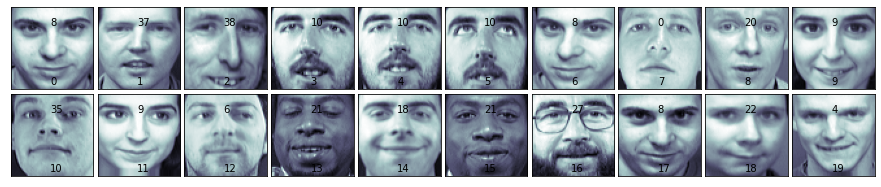

In [ ]:
def show_image(images, label, how_many=5):


    ##set up figure size in inches
    fig=plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0 , right=1 ,bottom=0, top=1, hspace=0.05,wspace=0.05)
    from random import randint

    for  i in range(how_many):
        #we will print images in matrix 10,10
        index = randint(0,images.shape[0])

        p = fig.add_subplot(10,10, i + 1 ,xticks=[],yticks=[])

        p.imshow( images[index], cmap=plt.cm.bone)
        #label the image with target value
        p.text(30, 14, str( label[index] ))
        p.text(30, 60, str(i))
        
show_image(images, labels, how_many=20)

In [ ]:
from sklearn.svm import SVC
model_linear_kernel = SVC( kernel="linear")

In [ ]:
images = images.reshape(-1, 64*64)

images = images / 255

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( images, labels, test_size=0.25, random_state=7)

In [ ]:
model_linear_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_linear_kernel.score(X_test, y_test)

0.96

In [ ]:
index_with_glasses = [
    (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
    (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)
]

In [ ]:
y = np.zeros(labels.shape)

for start, end in index_with_glasses:

    y[start: end + 1] = 1



In [ ]:
X_train, X_test, y_train, y_test = train_test_split( images, y, test_size=0.25, random_state=7 )

In [ ]:
model_linear_kernel = SVC(kernel = "linear" )
model_linear_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

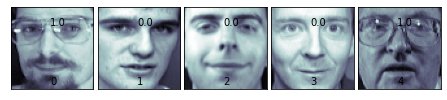

In [ ]:
show_image( X_test.reshape(-1,64,64), y_test )

In [ ]:
model_linear_kernel.score(X_test, y_test)

0.99